In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


airline = pd.read_csv("./customer_airways_data.csv", encoding="iso-8859-1")

#### Descripcion del set de datos. Vemos cuales son variables numericas y cuales categoricas

In [2]:
print(airline.shape)
airline.info()

(50000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory 

In [3]:
col_numericas = ["num_passengers","purchase_lead","length_of_stay","flight_hour","wants_extra_baggage","wants_preferred_seat","wants_in_flight_meals","flight_duration","booking_complete"]

col_categoricas = ["sales_channel","trip_type","flight_day","route","booking_origin"]

#### Veremos si tenemos:
 1. Datos faltantes
 3. Registros repetidos
 4. Outliers
 5. Errores tipograficos

#### 1. Datos faltantes

In [4]:
airline.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

#### 2. Registros repetidos

In [5]:
airline.duplicated().value_counts()


False    49281
True       719
dtype: int64

##### 2.1 Elimino las filas repetidas

In [7]:
airline.drop_duplicates(inplace=True)
airline.shape

(49281, 14)

#### 3. Outliers

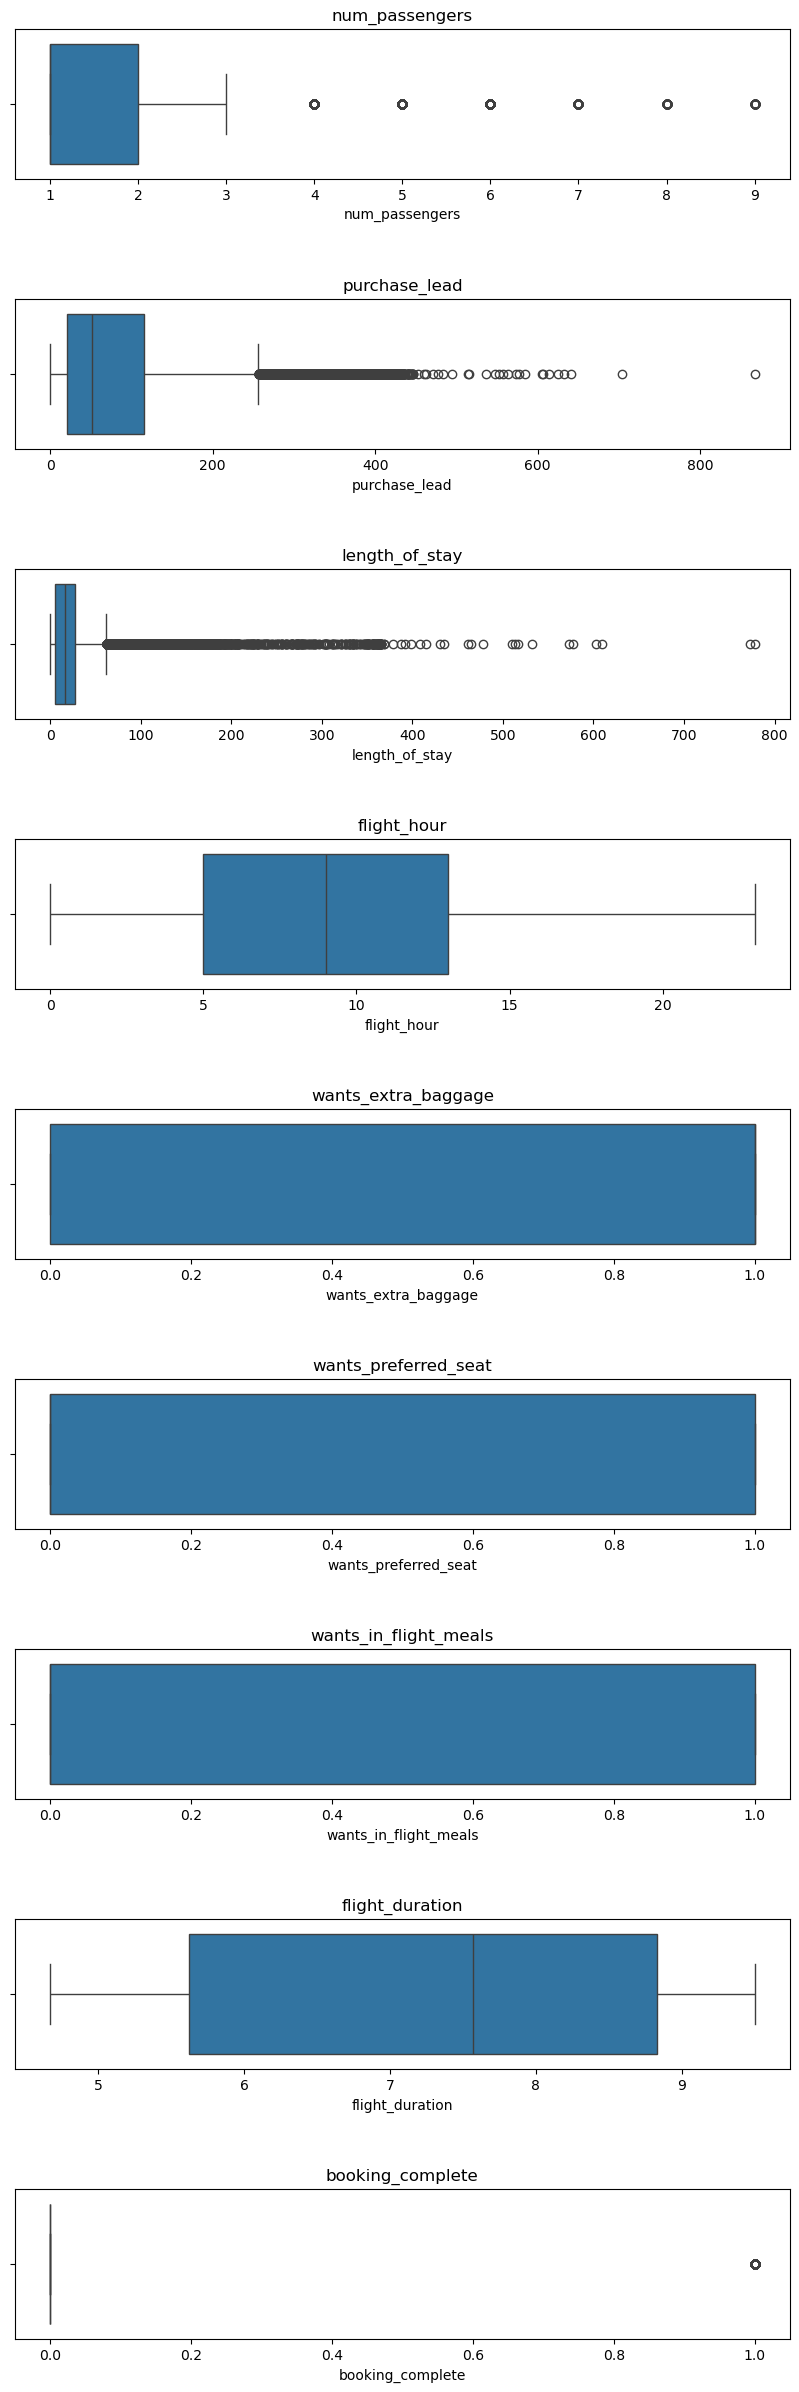

In [8]:
fig,ax = plt.subplots(ncols=1,nrows=len(col_numericas),figsize=(10,30))
fig.subplots_adjust(hspace=0.8)

for i,col in enumerate(col_numericas):
  sns.boxplot(x=col,data=airline,ax=ax[i])
  ax[i].set_title(col)